<a href="https://colab.research.google.com/github/Jeet1309/AI-ML-tss/blob/main/week3/YOLO/YOLOv8_assignemnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:

%cd /content/drive/MyDrive/yolo/yolo

/content/drive/MyDrive/yolo/yolo


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=640 plots=True

train: Scanning /content/drive/MyDrive/yolo/yolo/train/labels... 1509 images, 4 backgrounds, 0 corrupt: 100% 1513/1513 [16:15<00:00,  1.55it/s]
train: New cache created: /content/drive/MyDrive/yolo/yolo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/drive/MyDrive/yolo/yolo/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [01:44<00:00,  1.53it/s]
val: New cache created: /content/drive/MyDrive/yolo/yolo/valid/labels.cache
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

      Epoch    GPU_mem   box_loss   cl

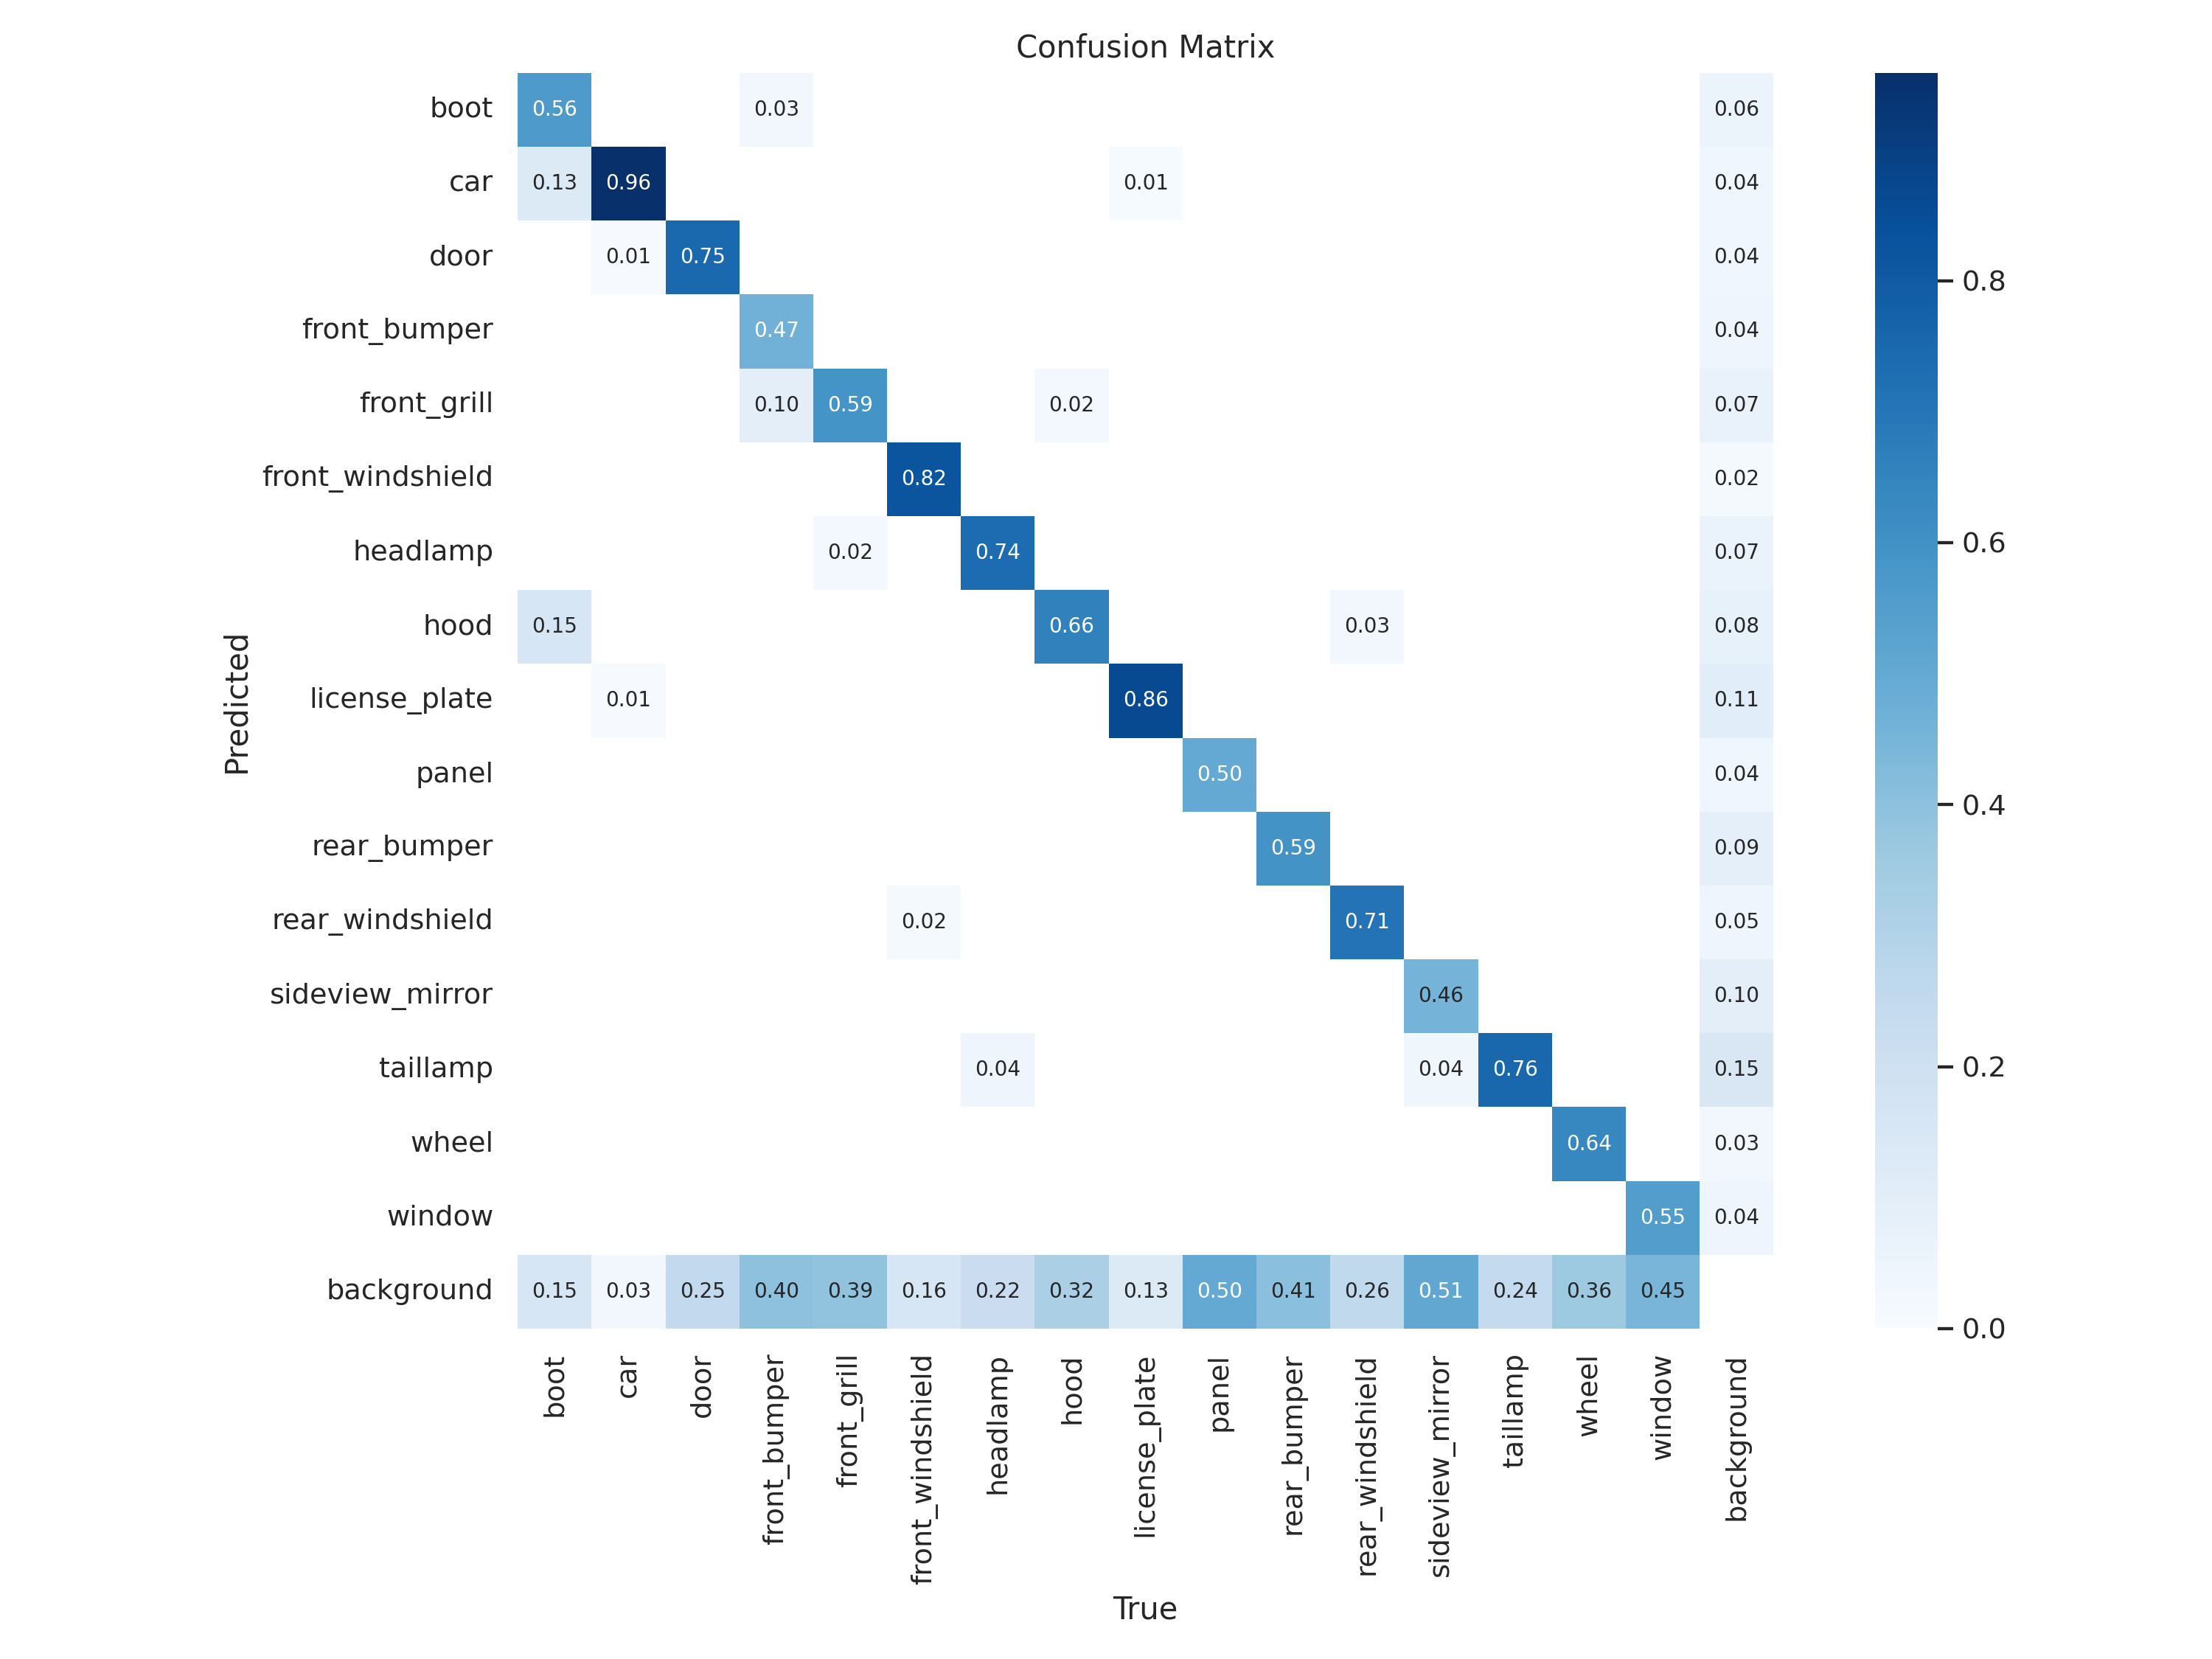

In [8]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

In [11]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2024-07-18 18:00:05.483102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 18:00:05.483162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 18:00:05.484669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 18:00:05.492350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 18:00:06.818583: W tensorflow/comp

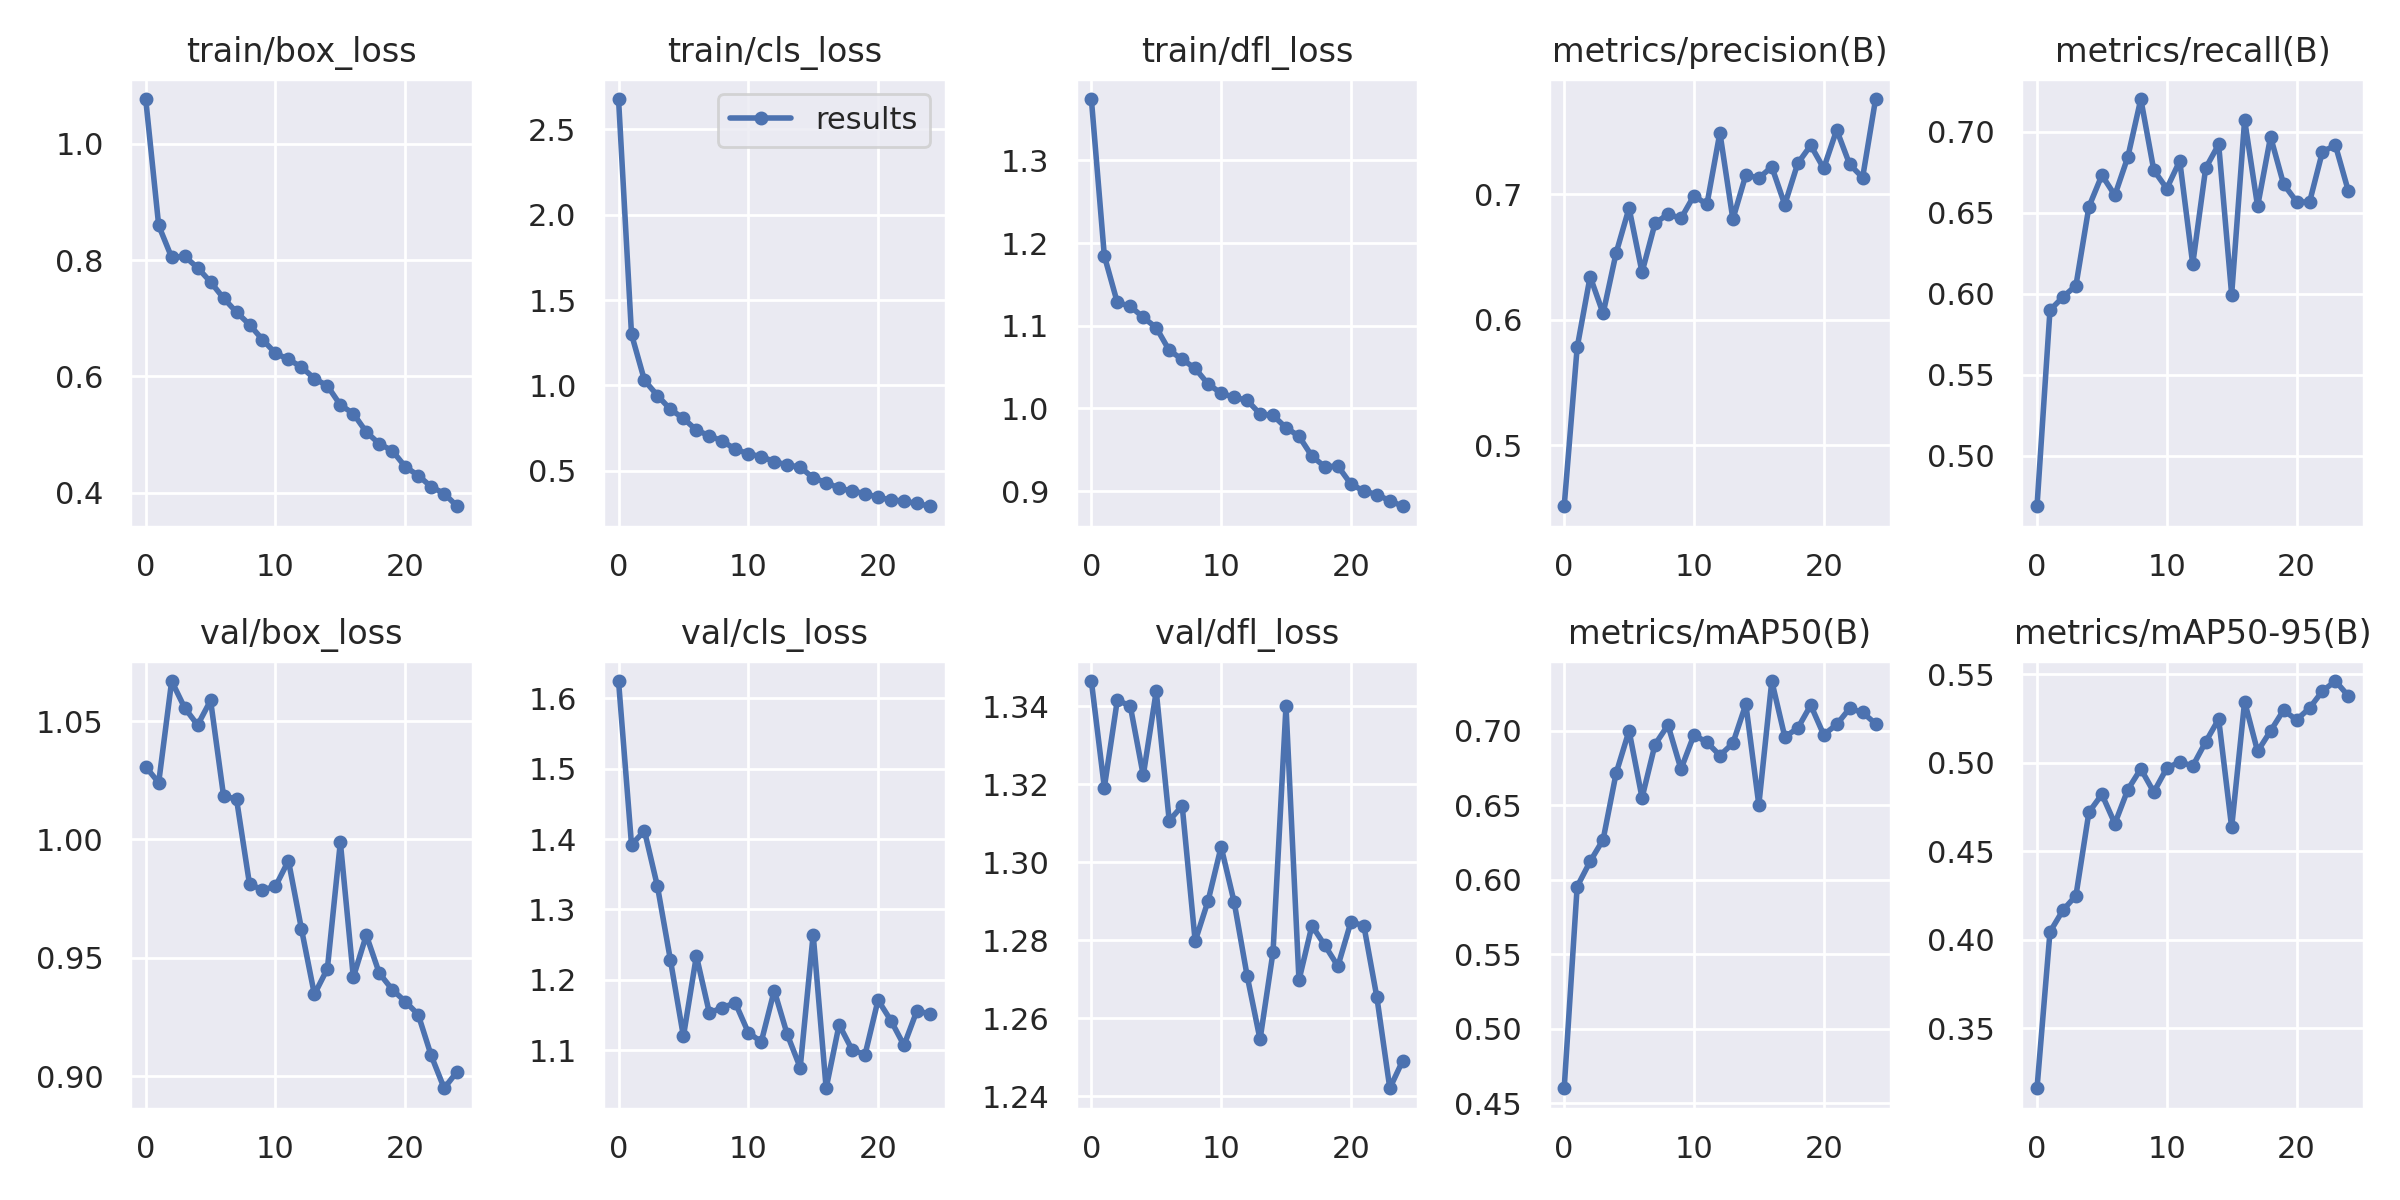

In [9]:

Image(filename='runs/detect/train/results.png', width=600)

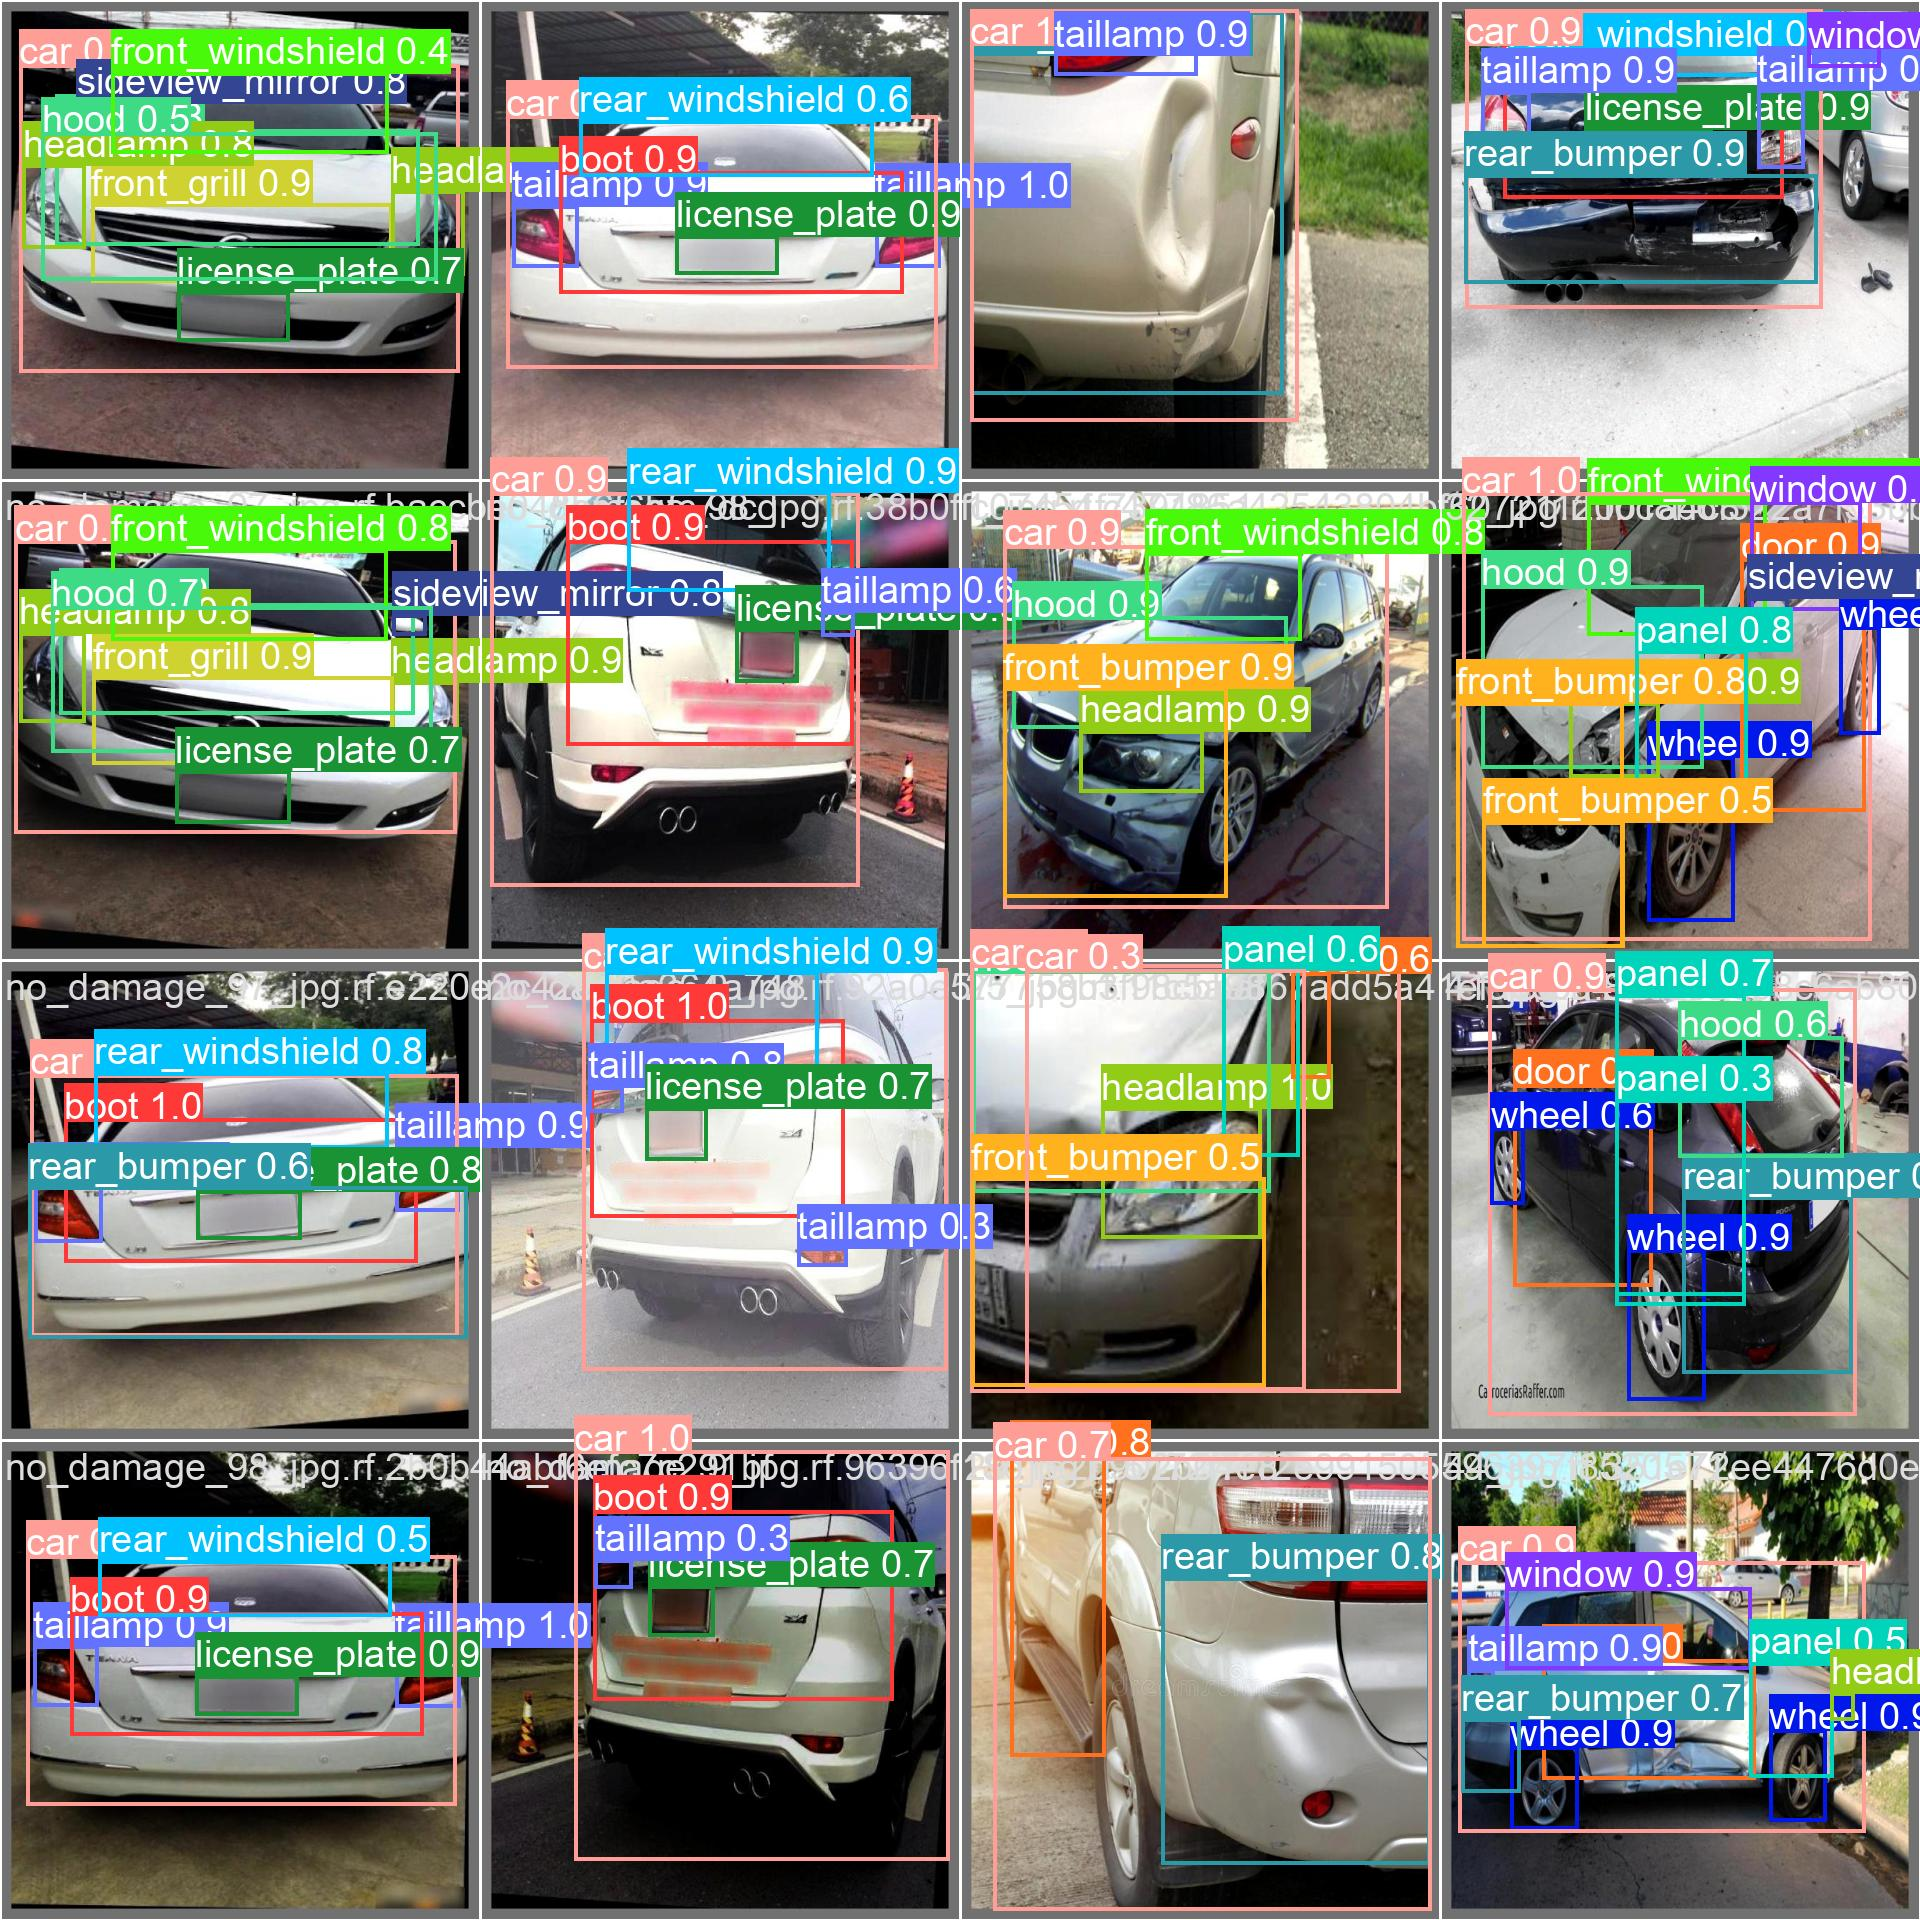

In [10]:

Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")